# Predicting Customer Interest on Vehicle Insurance

![image.png](attachment:image.png)

## 1.0 Business Understanding

### 1.1 Introduction
ICEA LION Group are a one-stop financial services provider offering innovative products and services in insurance, pensions, investments and trusts. The group is one of the largest providers of insurance and financial services in East Africa with well-established operations in Kenya, Uganda and Tanzania.

### 1.2 Problem Statement

The Group, comprising a Life Insurance company, a General Insurance company, an Asset Management company, and a Trust company, seeks to enhance its cross-selling strategies. The Life Insurance company within the group has amassed a substantial customer base over the past year. Now, the company aims to leverage this customer data to expand its offerings by predicting whether existing life insurance policyholders would also exhibit interest in Vehicle Insurance provided by the General Insurance company. The objective is to develop a predictive model that accurately identifies potential customers who are likely to purchase Vehicle Insurance, thereby optimizing marketing efforts and maximizing revenue generation opportunities for the ICEA LION Group.

### 1.3 Objective

The objective of this project is to predict whether recently acquired Life Insurance Policyholders (customers) will take up a vehicle insurance product provided by the sister company General Insurance company.

The project will:

- Evaluate factors that affect Customer cross sale of Vehicle Insurance .
- Identify and model combinations of features that best predict the success of a cross sale.
- Test and validate the accuracy of the model.
- Draw conclusions and recommendations.

#### 1.3.1 Research Questions
- Does Age of vehicle policyholders affect life policy uptake?

- Does Gender have an affect life policy uptake?

- Does County have an affect life policy uptake?

- Does year of manufacture of a vehicle affect life policy uptake?

- Does year of vehicle rapair affect life policy uptake?

#### 1.3.2 Business success criteria
The ICEA Lion Group will use our model to:

- identify geographical locations where Life policies perform well
- successfully show how varous features affects Life policy uptake
- improve sales of the Life policy from the sister company
- Which staff are performing well/struggling with life product

## 2.0 Data Understanding

The two files were available for the analysis:

● train_data_cross-sell.csv - contains the target variable “Response”. This is the dataset that
you will use to train your model.

● test_data_cross-sell.csv - resembles the training dataset but without the target-related
columns. This is the dataset on which you will apply your model to for submissions and
evaluation.

### 2.1 Key Columns Include:

- id: Unique ID for the customer
- Gender: Gender of the customer
- Customer_Date_of_Birth: Customer Date of Birth
- Driving_License:
    - 0 : Customer does not have DL
    - 1 : Customer already has DL
- Customer_Residence_Sub_County: Customer Residence Sub County
- Previously_Insured:
    - 1 : Customer already has Vehicle Insurance,
    - 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Year_of_Manufacture: Vehicle Year of Manufacture
- Vehicle_Damage:
    - 1 : Customer got his/her vehicle damaged in the past.
    - 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- Agent_name: Name of the life insurance sales agent who sold to the customer
- Life_policy_start_date: The effective date of the customers life insurance policy
- Response:
    - 1 : Customer is interested,
    - 0 : Customer is not interested

### 2.2 Data Preparation

#### Loading Relevant Data Libraries
To perform data exploration, preprocessing, and predictive modeling, several python libraries need to be imported.

In [ ]:
pip uninstall scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

### 2.3 Importing CSV Data Files
We first imports the CSV files using the `pd.read_csv()` function from the Pandas library. The two DataFrames created are:
- `training_set_values`: Contains training data values.
- `test_set_values`: Contains test data values.

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [7]:
# Loading the csv files
training_set_values = pd.read_csv("train_data_cross-sell.csv")
test_set_values = pd.read_csv("test_data_cross-sell.csv")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


## 3.0 Data preparation
In this section, we selected the features relevant to our analysis.

Then grouped them into categorical and numerical columns

The numerical columns selected are:
- id
- Driving_License
- Previously_Insured
- Vehicle_Year_of_Manufacture
- Annual_Premium
- Response

The numerical columns selected are:
- Gender
- Customer_Residence_Sub_County
- Vehicle_Damage
- Agent_name
- Life_policy_start_date   
- Customer_Date_of_Birth


### 3.1 Data Cleaning

This section involves:

1. Checking for consistency

2. Checking for completeness

3. Checking for validity

4. Checking for uniformity

#### 3.1.1 Consistency
Here we check if there are any duplicated values. These are records with the same value in the same field across two or more records.

In [ ]:
#checking for duplicates
training_set_values.duplicated().sum()

0

#### 3.1.2 Completeness
Here we assess whether all the requisite is available and if there are any missing values.

We further check if the missing values are random or intentional.

In [8]:
#function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

In [9]:
#calling the function above
missing_values(training_set_values)

,Missing Values,In Percentage


In [10]:
#calling the function above
missing_values(test_set_values)

,Missing Values,In Percentage


#### 3.1.3 Validity
Here we check for outliers in our dataset

In [ ]:
def box_plot(data,column,hue=None):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=column,data=data,hue=hue)
    plt.title(f"{column} ouliers")
    plt.xticks
    plt.show()

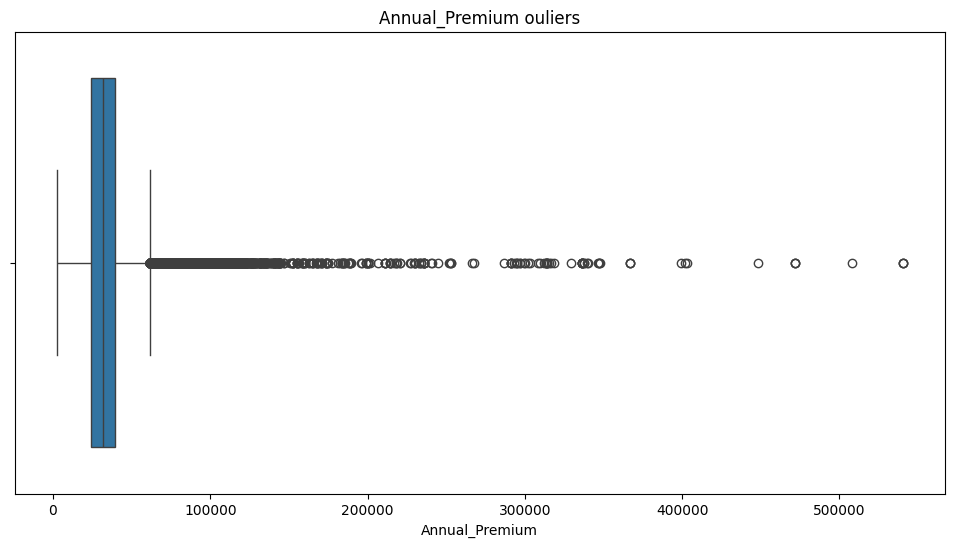

In [ ]:
box_plot(training_set_values, 'Annual_Premium')

There are outliers on Annual Premiums but the numners are naturally distributed

#### 3.1.4  Uniformity
Here we check for the uniformity of the data and this includes looking at the data types of the different columns and ensuring they are are correct.

Also, we check to ensure the labels of the columns are uniform and explicit

In [ ]:
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324466 entries, 0 to 324465
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   id                             324466 non-null  int64 
 1   Gender                         324466 non-null  object
 2   Customer_Date_of_Birth         324466 non-null  object
 3   Driving_License                324466 non-null  int64 
 4   Customer_Residence_Sub_County  324466 non-null  object
 5   Previously_Insured             324466 non-null  int64 
 6   Vehicle_Year_of_Manufacture    324466 non-null  int64 
 7   Vehicle_Damage                 324466 non-null  object
 8   Annual_Premium                 324466 non-null  int64 
 9   Agent_name                     324466 non-null  object
 10  Life_policy_start_date         324466 non-null  object
 11  Response                       324466 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 29.7+ M

## 4.0 Exploratory Data Analysis (EDA)
### 4.1 Data Structure and Summary Statistics

In [ ]:
training_set_values.shape

(324466, 12)

In [ ]:
training_set_values.dtypes

id                                int64
Gender                           object
Customer_Date_of_Birth           object
Driving_License                   int64
Customer_Residence_Sub_County    object
Previously_Insured                int64
Vehicle_Year_of_Manufacture       int64
Vehicle_Damage                   object
Annual_Premium                    int64
Agent_name                       object
Life_policy_start_date           object
Response                          int64
dtype: object

In [ ]:
def explore_datasets():
    # Importing the csv files
    training_set_values = pd.read_csv("train_data_cross-sell.csv")
    test_set_values = pd.read_csv("test_data_cross-sell.csv")

    # Explore the structure of datasets
    def explore_structure(data, name):
        print(f"Structure of {name}:")
        display(data.head())
        print("\n")

    explore_structure(training_set_values, "training_set_values")
    explore_structure(test_set_values, "test_set_values")

    # Explore the first few rows of the datasets
    def explore_first_few_rows(data, name):
        print(f"First few rows of {name}:")
        display(data.head())
        print("\n")

    explore_first_few_rows(training_set_values, "training_set_values")
    explore_first_few_rows(test_set_values, "test_set_values")

   # Call the function to output the desired information
explore_datasets()

Structure of training_set_values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0




Structure of test_set_values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date
0,67379821,Male,"Tuesday, April 15, 1980",1,EMBAKASI,0,2019,Yes,40454,Jomo Kenyatta,"Wednesday, June 14, 2023"
1,27453875,Male,"Saturday, December 20, 1947",1,ATHI RIVER,0,2015,No,33536,Jomo Kenyatta,"Tuesday, July 18, 2023"
2,36791915,Male,"Tuesday, March 17, 1953",1,EMBAKASI,1,2012,No,46818,Mwangi Kariuki,"Monday, November 20, 2023"
3,7592451,Female,"Saturday, March 20, 1999",1,TURBO,0,2013,Yes,26218,Gitonga Mwangi,"Saturday, May 6, 2023"
4,102094371,Male,"Friday, October 23, 1981",1,EMBAKASI,0,2014,Yes,33667,Njoroge Karanja,"Saturday, August 12, 2023"




First few rows of training_set_values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0




First few rows of test_set_values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date
0,67379821,Male,"Tuesday, April 15, 1980",1,EMBAKASI,0,2019,Yes,40454,Jomo Kenyatta,"Wednesday, June 14, 2023"
1,27453875,Male,"Saturday, December 20, 1947",1,ATHI RIVER,0,2015,No,33536,Jomo Kenyatta,"Tuesday, July 18, 2023"
2,36791915,Male,"Tuesday, March 17, 1953",1,EMBAKASI,1,2012,No,46818,Mwangi Kariuki,"Monday, November 20, 2023"
3,7592451,Female,"Saturday, March 20, 1999",1,TURBO,0,2013,Yes,26218,Gitonga Mwangi,"Saturday, May 6, 2023"
4,102094371,Male,"Friday, October 23, 1981",1,EMBAKASI,0,2014,Yes,33667,Njoroge Karanja,"Saturday, August 12, 2023"


#### 4.2 Feature Engineering and Selection

In [11]:
#Calculating new column Age
from datetime import datetime

def calculate_age(df):
    # Convert 'dateofbirth' column to datetime
    df['dateofbirth'] = pd.to_datetime(df['Customer_Date_of_Birth'])

    # Calculate age based on today's date
    today = datetime.today()
    age_in_days = (today - df['dateofbirth']).dt.days

    # Convert age from days to years
    df['age'] = age_in_days // 365

    return df

# Assuming 'training_set_values' and 'test_set_values' are your DataFrames
# Apply the function to both DataFrames
training_set_values = calculate_age(training_set_values)
test_set_values = calculate_age(test_set_values)

# Print the modified DataFrames to verify the changes
print("Training Set Values:")
display(training_set_values.head())

print("\nTest Set Values:")
display(test_set_values.head())

Training Set Values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response,dateofbirth,age
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1,1977-03-07,47
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0,2002-12-29,21
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0,1994-08-23,29
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0,1999-11-18,24
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0,2001-02-22,23



Test Set Values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,dateofbirth,age
0,67379821,Male,"Tuesday, April 15, 1980",1,EMBAKASI,0,2019,Yes,40454,Jomo Kenyatta,"Wednesday, June 14, 2023",1980-04-15,43
1,27453875,Male,"Saturday, December 20, 1947",1,ATHI RIVER,0,2015,No,33536,Jomo Kenyatta,"Tuesday, July 18, 2023",1947-12-20,76
2,36791915,Male,"Tuesday, March 17, 1953",1,EMBAKASI,1,2012,No,46818,Mwangi Kariuki,"Monday, November 20, 2023",1953-03-17,70
3,7592451,Female,"Saturday, March 20, 1999",1,TURBO,0,2013,Yes,26218,Gitonga Mwangi,"Saturday, May 6, 2023",1999-03-20,24
4,102094371,Male,"Friday, October 23, 1981",1,EMBAKASI,0,2014,Yes,33667,Njoroge Karanja,"Saturday, August 12, 2023",1981-10-23,42


In [12]:
#Calculating year from Policy start date

def extract_year(df, Life_policy_start_date):
    # Convert the specified column to datetime
    df[Life_policy_start_date] = pd.to_datetime(df[Life_policy_start_date])

    # Extract the year component from the datetime
    df['lifeinsuredyr'] = df[Life_policy_start_date].dt.year

    return df

# Apply the function to both DataFrames
training_set_values = extract_year(training_set_values, 'Life_policy_start_date')
test_set_values = extract_year(test_set_values, 'Life_policy_start_date')

# Print the modified DataFrames to verify the changes
print("Training Set Values:")
display(training_set_values.head())

print("\nTest Set Values:")
display(test_set_values.head())


Training Set Values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response,dateofbirth,age,lifeinsuredyr
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,2023-12-21,1,1977-03-07,47,2023
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,2023-06-28,0,2002-12-29,21,2023
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,2023-12-09,0,1994-08-23,29,2023
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,2023-07-25,0,1999-11-18,24,2023
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,2023-05-13,0,2001-02-22,23,2023



Test Set Values:


,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,dateofbirth,age,lifeinsuredyr
0,67379821,Male,"Tuesday, April 15, 1980",1,EMBAKASI,0,2019,Yes,40454,Jomo Kenyatta,2023-06-14,1980-04-15,43,2023
1,27453875,Male,"Saturday, December 20, 1947",1,ATHI RIVER,0,2015,No,33536,Jomo Kenyatta,2023-07-18,1947-12-20,76,2023
2,36791915,Male,"Tuesday, March 17, 1953",1,EMBAKASI,1,2012,No,46818,Mwangi Kariuki,2023-11-20,1953-03-17,70,2023
3,7592451,Female,"Saturday, March 20, 1999",1,TURBO,0,2013,Yes,26218,Gitonga Mwangi,2023-05-06,1999-03-20,24,2023
4,102094371,Male,"Friday, October 23, 1981",1,EMBAKASI,0,2014,Yes,33667,Njoroge Karanja,2023-08-12,1981-10-23,42,2023


In [13]:
# Dropping the irrelevant columns
def drop_id_column(df):
    return df.drop(columns=['id', 'Life_policy_start_date', 'Customer_Date_of_Birth', 'dateofbirth'])

# Apply the function to both DataFrames
training_set_values = drop_id_column(training_set_values)
test_set_values = drop_id_column(test_set_values)

# Print the modified DataFrames to verify the 'id' column has been dropped
print("Training Set Values:")
display(training_set_values.head())

print("\nTest Set Values:")
display(test_set_values.head())

Training Set Values:


,Gender,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Response,age,lifeinsuredyr
0,Male,1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,1,47,2023
1,Male,1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,0,21,2023
2,Female,1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,0,29,2023
3,Female,1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,0,24,2023
4,Male,1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,0,23,2023



Test Set Values:


,Gender,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,age,lifeinsuredyr
0,Male,1,EMBAKASI,0,2019,Yes,40454,Jomo Kenyatta,43,2023
1,Male,1,ATHI RIVER,0,2015,No,33536,Jomo Kenyatta,76,2023
2,Male,1,EMBAKASI,1,2012,No,46818,Mwangi Kariuki,70,2023
3,Female,1,TURBO,0,2013,Yes,26218,Gitonga Mwangi,24,2023
4,Male,1,EMBAKASI,0,2014,Yes,33667,Njoroge Karanja,42,2023


### 4.3 Univariate Analysis
Univariate is a common term that you use in statistics to describe a type of data that contains only one attribute or characteristic.

In this analysis, we only take one variable, summarise it and find patterns in its data against its value counts. We will start with categorical then finish with numerical data.

#### 4.2.1 Categorical Columns Univariate Analysis

Response - This is our target variable which indicates whether vehicle policy holders bought life insurance or not

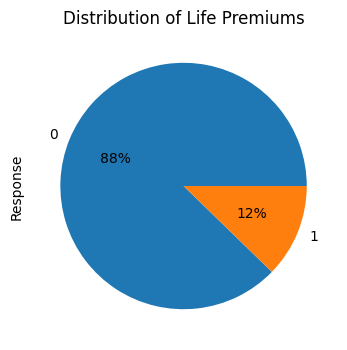

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
training_set_values['Response'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Distribution of Life Premiums');

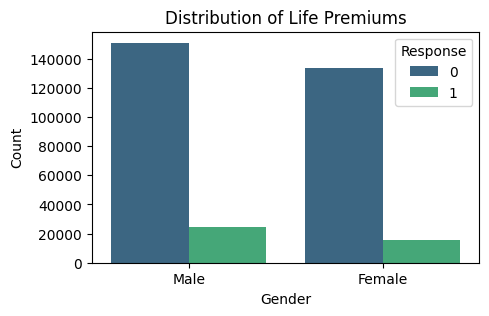

In [ ]:
#Gender Distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=training_set_values, x='Gender',hue='Response', palette='viridis')
plt.title('Distribution of Life Premiums')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

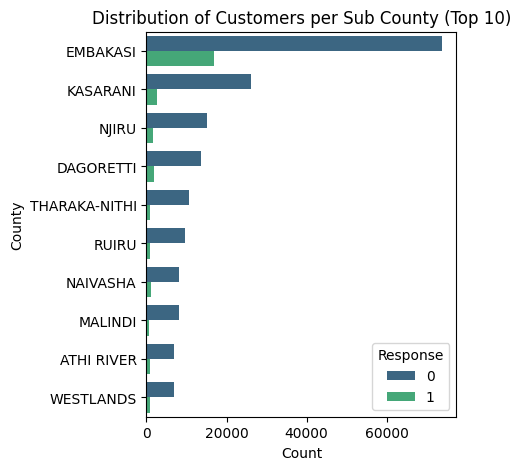

In [ ]:
# Get the top 10 sub counties in descending order
top_10_counties = training_set_values['Customer_Residence_Sub_County'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 counties
training_set_values_top_10 = training_set_values[training_set_values['Customer_Residence_Sub_County'].isin(top_10_counties)]

# Plot the countplot for the top 10 counties
plt.figure(figsize=(4, 5))
sns.countplot(data=training_set_values_top_10, y='Customer_Residence_Sub_County',hue='Response', palette='viridis', order=top_10_counties)
plt.title('Distribution of Customers per Sub County (Top 10)')
plt.ylabel('County')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

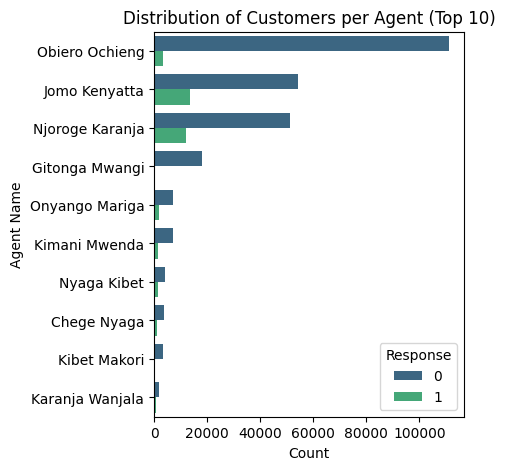

In [ ]:
# Get the top 10 counties in descending order
top_10_counties = training_set_values['Agent_name'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 counties
training_set_values_top_10 = training_set_values[training_set_values['Agent_name'].isin(top_10_counties)]

# Plot the countplot for the top 10 counties
plt.figure(figsize=(4, 5))
sns.countplot(data=training_set_values_top_10, y='Agent_name',hue='Response', palette='viridis', order=top_10_counties)
plt.title('Distribution of Customers per Agent (Top 10)')
plt.ylabel('Agent Name')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

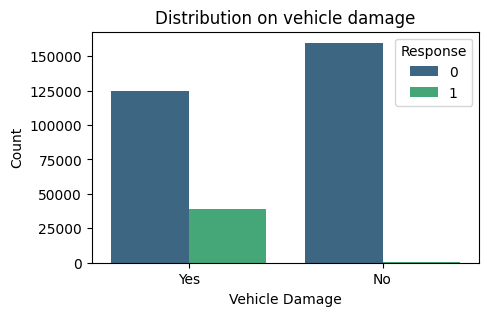

In [ ]:
#Vehicle Damage Distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=training_set_values, x='Vehicle_Damage',hue='Response', palette='viridis')
plt.title('Distribution on vehicle damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

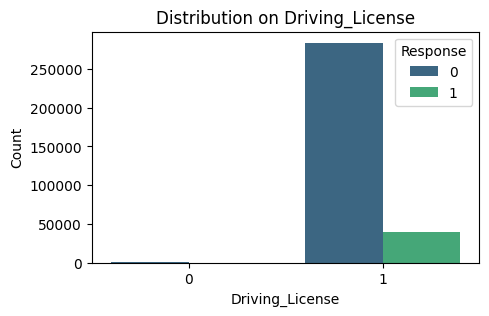

In [ ]:
#Distribution on Driving_License
plt.figure(figsize=(5, 3))
sns.countplot(data=training_set_values, x='Driving_License',hue='Response', palette='viridis')
plt.title('Distribution on Driving_License')
plt.xlabel('Driving_License')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

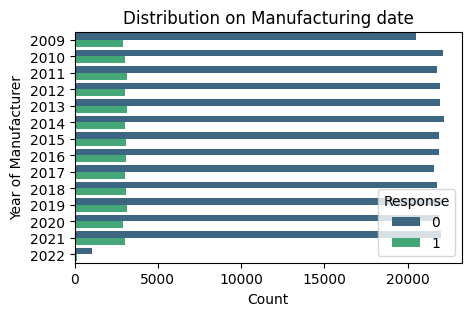

In [ ]:
#Vehicle manufacturing Age Distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=training_set_values, y='Vehicle_Year_of_Manufacture',hue='Response', palette='viridis')
plt.title('Distribution on Manufacturing date')
plt.ylabel('Year of Manufacturer')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

### 4.4 Numerical Columns Multivariate Analysis

array([[<Axes: title={'center': 'Driving_License'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Vehicle_Year_of_Manufacture'}>],
       [<Axes: title={'center': 'Annual_Premium'}>,
        <Axes: title={'center': 'Response'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'lifeinsuredyr'}>, <Axes: >, <Axes: >]],
      dtype=object)

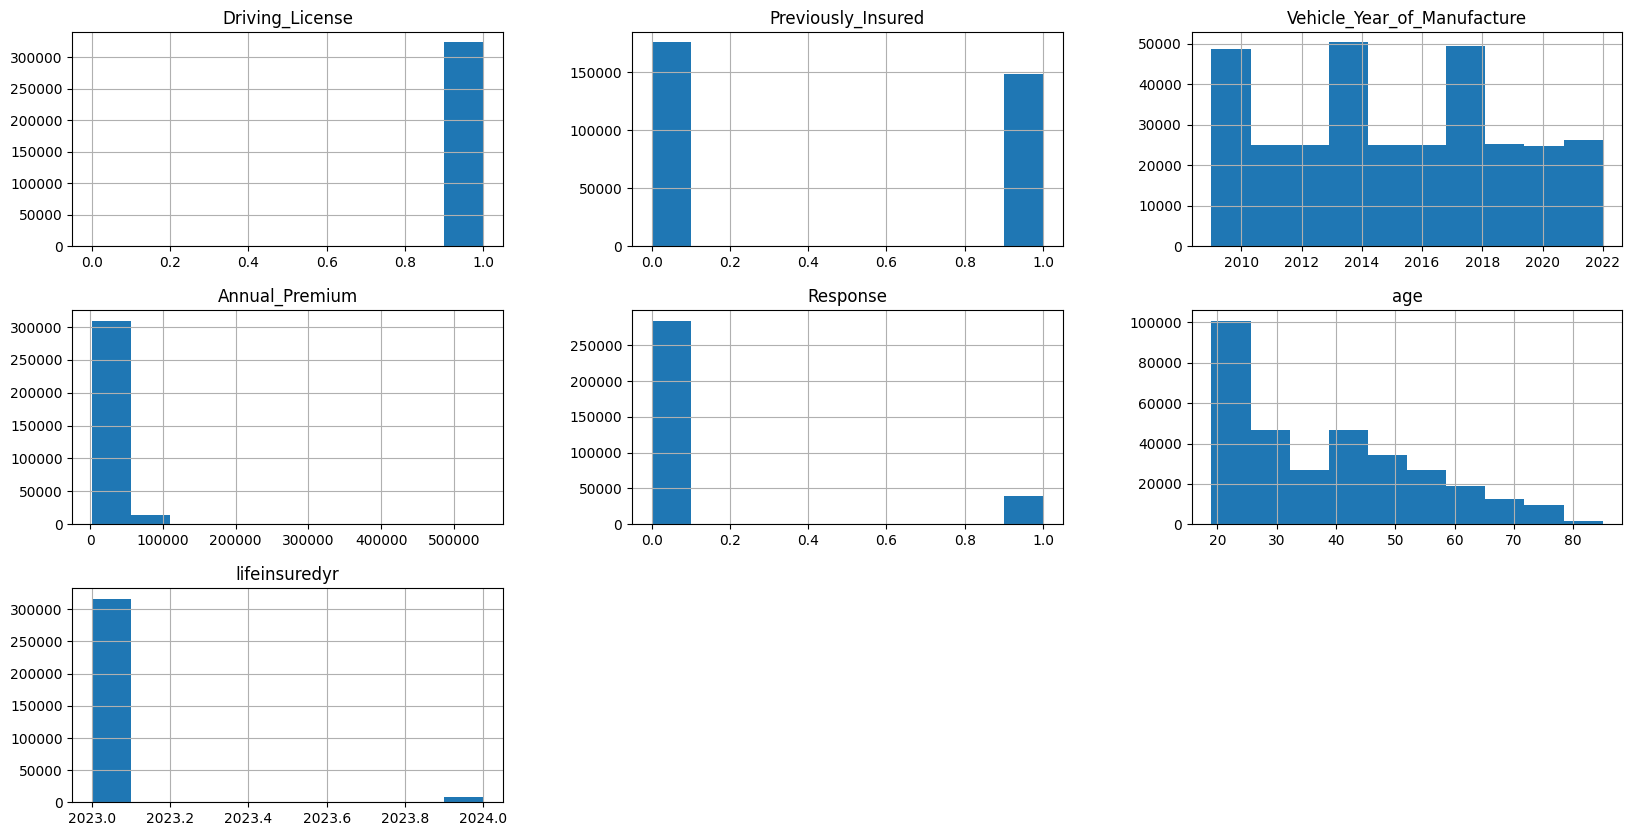

In [ ]:
#Plotting numerical values in df

training_set_values.hist(figsize=(20,10))

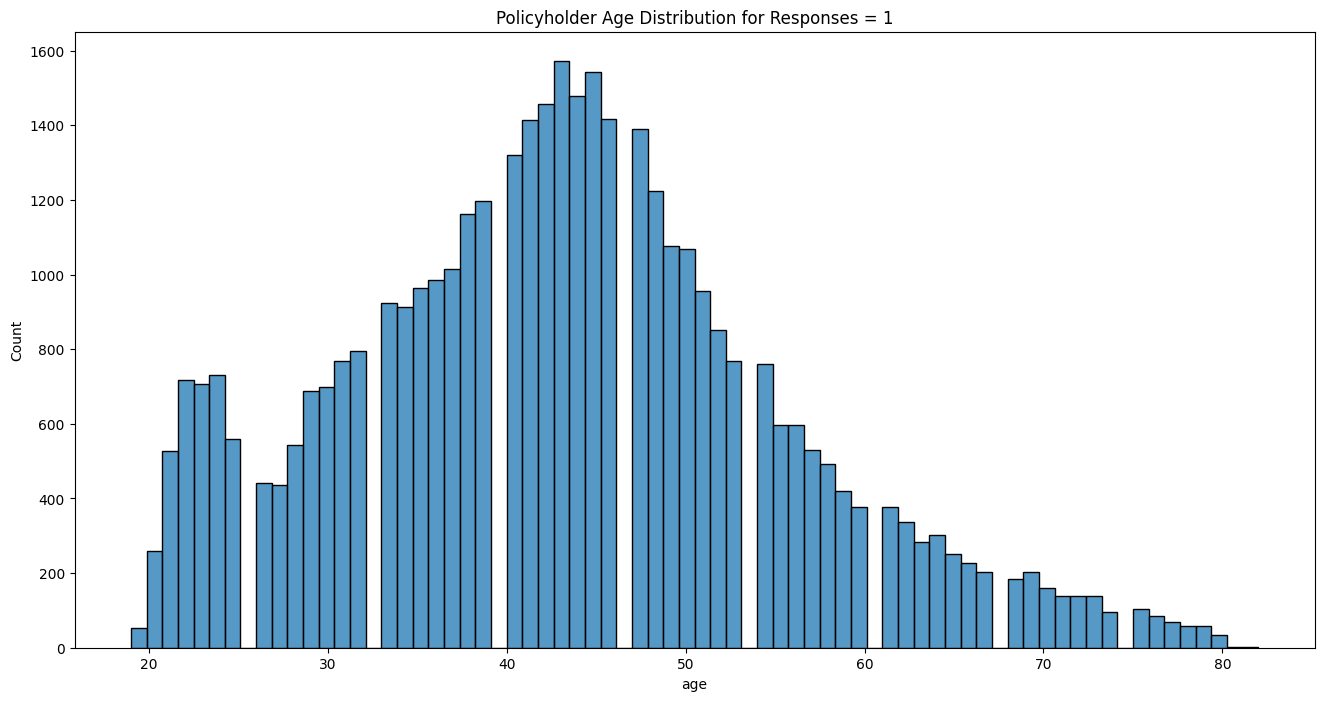

In [ ]:
# Filter the DataFrame to include only rows where Responses = 1
response_data = training_set_values[training_set_values["Response"] == 1]
f = plt.figure(figsize=(16, 8))
sns.histplot(data=response_data["age"])
plt.title('Policyholder Age Distribution for Responses = 1')
plt.show()

The young population seems to have a higher amount of people purchasing insurance policies. This population steadily decreases till it hits about 80 as the population ages.

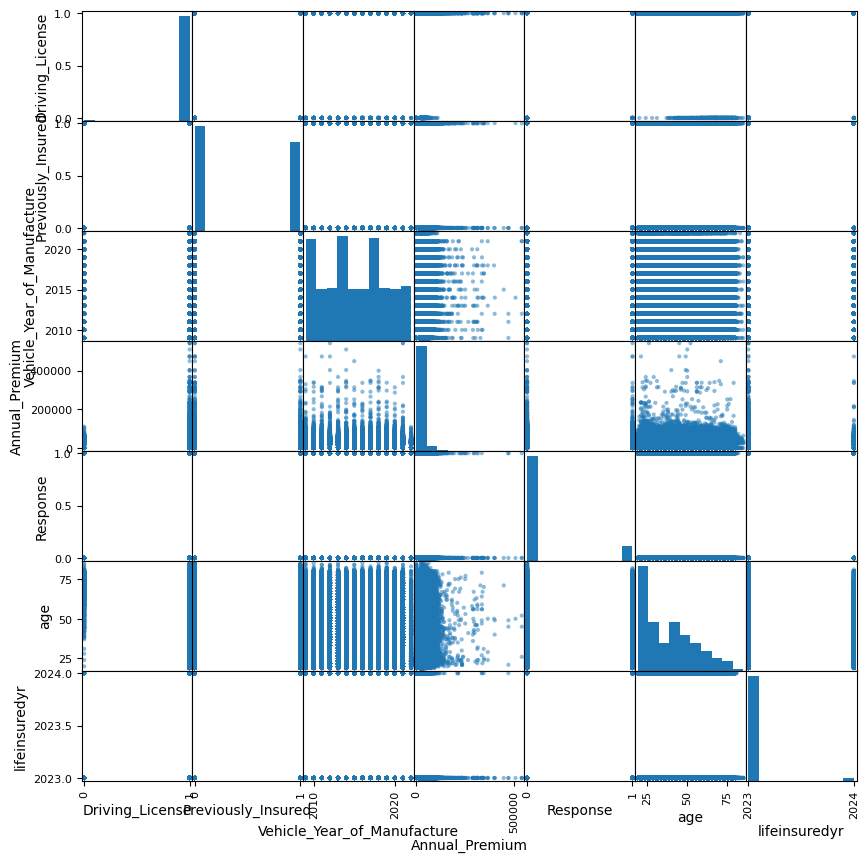

In [ ]:
%matplotlib inline
numerical_features = training_set_values.select_dtypes(include=["int64", "int32"])
pd.plotting.scatter_matrix(numerical_features, figsize=(10, 10));


### 4.4 Correlation Heatmap Analysis
To understand the relationships between different features in the dataset, we visualize the correlation heatmap.
- **Correlation Analysis**: The heatmap visualizes the correlation coefficients between all pairs of numerical features in the dataset. It helps identify patterns and relationships among variables.
- **Feature Selection**: High correlations (positive or negative) between features may indicate redundancy or multicollinearity, guiding feature selection or engineering efforts. This analysis aids in building more accurate predictive models by identifying relevant features.
- **Insight Generation**: Correlation analysis provides insights into potential relationships between features, enabling better understanding of the dataset's structure and underlying patterns.


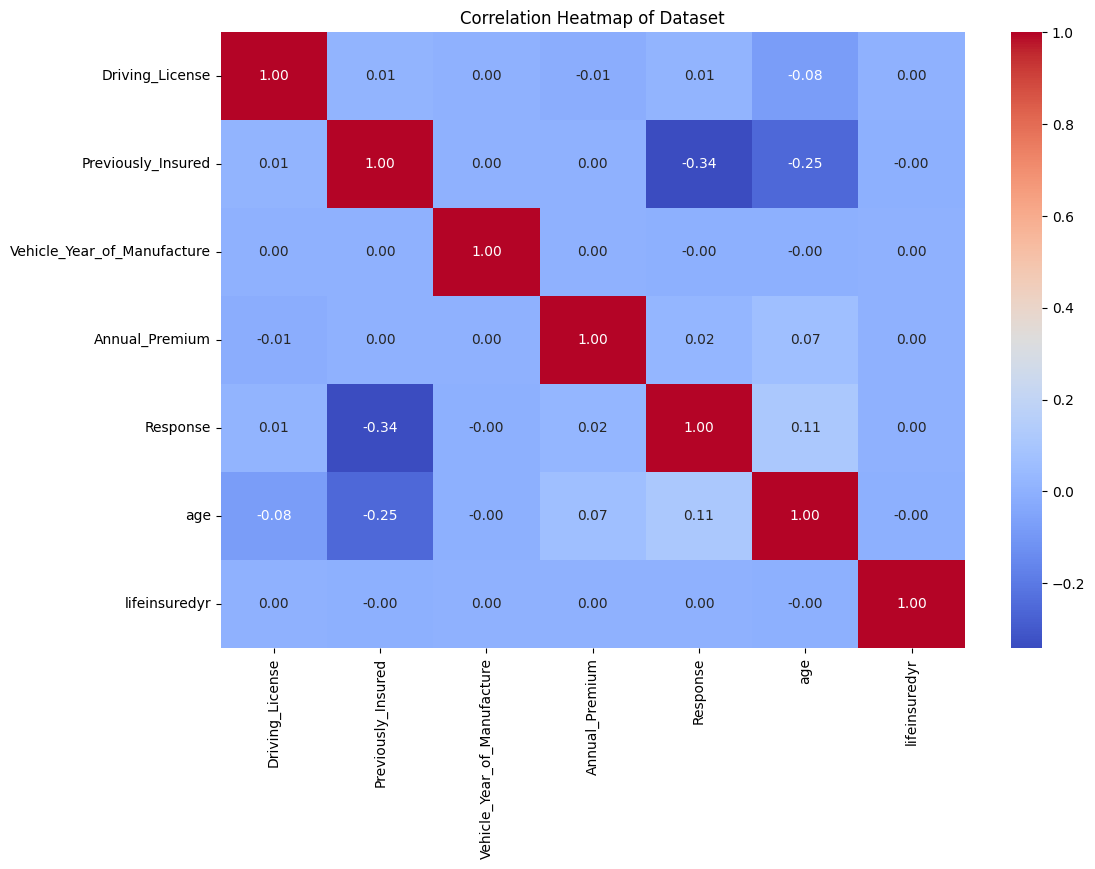

In [ ]:
# Create a heatmap to check the correlation among features
# Extract numerical features
numerical_features = training_set_values.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')
plt.show()


## 5.0 Modeling
The models used are:

1. Logistic Regression

2. Decision Tree

3. KNN Model

4. Random Forest

5. XGBoost

### 5.1 Preprocessing


In [ ]:
display(training_set_values.head())

,Gender,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Response,age,lifeinsuredyr
0,Male,1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,1,47,2023
1,Male,1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,0,21,2023
2,Female,1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,0,29,2023
3,Female,1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,0,24,2023
4,Male,1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,0,23,2023


In [ ]:
training_set_values.dtypes

Gender                           object
Driving_License                   int64
Customer_Residence_Sub_County    object
Previously_Insured                int64
Vehicle_Year_of_Manufacture       int64
Vehicle_Damage                   object
Annual_Premium                    int64
Agent_name                       object
Response                          int64
age                               int64
lifeinsuredyr                     int64
dtype: object

### 5.1.1 Checking for Class Imbalance
The imbalance ratio of 13% indicates that the minority class(+ve Response) is underrepresented compared to the majority class (-ve Response). Such an imbalance can pose challenges in model training, evaluation, and interpretation, as algorithms tend to be biased towards the majority class, resulting in poor predictive performance for the minority class.

Imbalance ratio: 0.13999718923476917


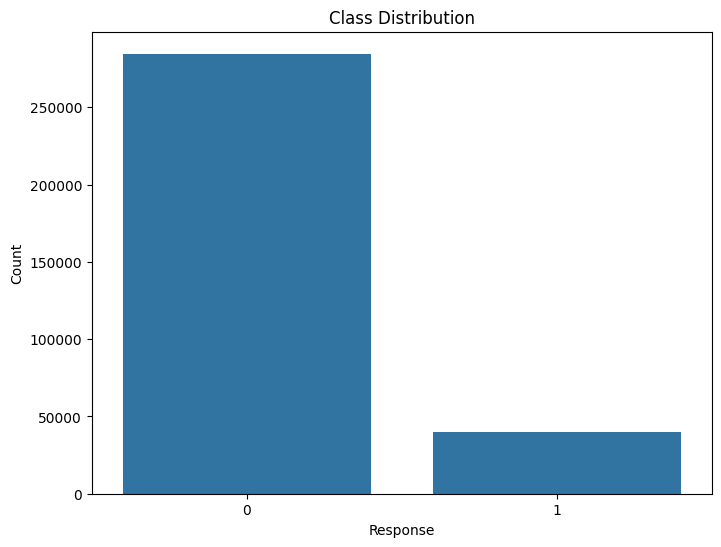

In [ ]:
# Count the occurrences of each class
class_counts = training_set_values['Response'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]
print("Imbalance ratio:", imbalance_ratio)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=training_set_values)
plt.title('Class Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

### 5.1.2 Splitting Train and Test Data

In [14]:
# Define X , y and Z
y = training_set_values["Response"]
X = training_set_values.drop(["Response"], axis=1)
Z = test_set_values
# Separate the columns by their type
nums = X.select_dtypes(include=['int64', 'float64']).columns
cats = X.select_dtypes(include=['object']).columns
znums = Z.select_dtypes(include=['int64', 'float64']).columns
zcats = Z.select_dtypes(include=['object']).columns

# Transform the target variable into integers
label = LabelEncoder()
y_transformed = label.fit_transform(y)

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size=0.2, stratify=y_transformed, random_state=42)

In [ ]:
class_counts = training_set_values['Response'].value_counts()
class_counts

0    284620
1     39846
Name: Response, dtype: int64

### 5.1.3 Scaling Numerical Values

In [15]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train[nums])
X_val_scaled = scaler.transform(X_val[nums])
Z_val_scaled = scaler.transform(Z[nums])

In [16]:
# converting into a dataframe

scaled_df_train = pd.DataFrame(data = X_train_scaled, columns = X_train[nums].columns, index = X_train.index)
scaled_df_val = pd.DataFrame(data = X_val_scaled, columns = X_val[nums].columns, index = X_val.index)
zscaled_df_val = pd.DataFrame(data = Z_val_scaled, columns = Z[nums].columns, index = Z.index)


### 5.1.4 Encoding Categorical Data

In [17]:
# one hot encoding for categorical columns

X_train_cat = pd.get_dummies(data = X_train[cats], drop_first=True)
X_val_cat = pd.get_dummies(data = X_val[cats], drop_first=True)
Z_val_cat = pd.get_dummies(data = Z[cats], drop_first=True)


In [18]:
# Merge the training categories and the scaled numerical categories into a dataframe

train_df_scaled= pd.merge(scaled_df_train, X_train_cat, left_index=True, right_index=True)
val_df_scaled = pd.merge(scaled_df_val, X_val_cat, left_index=True, right_index=True)
zval_df_scaled = pd.merge(zscaled_df_val, Z_val_cat, left_index=True, right_index=True)

#### 5.1.5 SMOTE (Synthetic Minority Over-sampling Technique)

In [19]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy= 0.5, random_state=42)  # You can adjust sampling_strategy as needed

# Apply SMOTE to balance the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(train_df_scaled, y_train)


### 5.2 Baseline Model - Logistic Regression

In [ ]:
# The logisitic model was instantiated with the hyperparameters multiclass, solver and random_state
baseline = LogisticRegression(random_state=42)

# Fit the logistitic regression model
baseline.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

y_pred = cross_val_predict(baseline, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)


Accuracy: 0.7799216494603884
Precision: 0.6430457453496542
Recall: 0.763682837492424
Confusion Matrix:
F1 Score: 0.6981915423285097
[[179433  48262]
 [ 26904  86943]]


In [ ]:
# Cross validaion on labels set

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

y_pred = cross_val_predict(baseline, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8771226923906679
Precision: 0.0
Recall: 0.0
Confusion Matrix:
F1 Score: 0.0
[[56920     5]
 [ 7969     0]]


Our Model performs relatively poorly on the training data (77% accuracy) but better on the test data (87% accuracy) This discrepancy suggests that the model has learned to memorize the training data rather than generalize from it. The model is quitw biased towards the dorminant category.

In [ ]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs','sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [ ]:
# Instantiate GridSearchCV
baseline_grid_search = GridSearchCV(estimator = baseline,
                              param_grid = param_grid,
                              cv = 5,
                              return_train_score = True)

# Baseline
baseline_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             return_train_score=True)

In [ ]:
print(f"The best model parameters are: {baseline_grid_search.best_params_}")

The best model parameters are: {'multi_class': 'multinomial', 'solver': 'newton-cg'}


In [21]:
# Initialize model with tuned parameters

tuned_baseline = LogisticRegression(random_state=42, multi_class="auto",solver="newton-cg")

# Fit the model on the training data
tuned_baseline.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='newton-cg')

In [22]:
# Cross validation score on training set
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

y_pred = cross_val_predict(tuned_baseline, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.7812069965040903
Precision: 0.6453648240907267
Recall: 0.7627693307684875
Confusion Matrix:
F1 Score: 0.699172721966144
[[179976  47719]
 [ 27008  86839]]


In [23]:
# Cross validaion on labels set

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

y_pred = cross_val_predict(tuned_baseline, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8771226923906679
Precision: 0.0
Recall: 0.0
Confusion Matrix:
F1 Score: 0.0
[[56920     5]
 [ 7969     0]]


There was no difference in the cross validation scores in tuned and the baseline model. The baseline model automatically chose the best hyperparameters

### 5.3 Decision Tree

In [24]:
# Instantiate the decision tree model

dt_model = DecisionTreeClassifier(random_state=42)

# Fit model on train data

dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Cross validation on test labels
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
y_pred = cross_val_predict(dt_model, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8569926978234009
Precision: 0.7872419400452488
Recall: 0.7824360764886207
Confusion Matrix:
F1 Score: 0.7848316512407543
[[203621  24074]
 [ 24769  89078]]


In [25]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

y_pred = cross_val_predict(dt_model, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8256541436804635
Precision: 0.26663876098786105
Recall: 0.2398042414355628
Confusion Matrix:
F1 Score: 0.25251057082452427
[[51669  5256]
 [ 6058  1911]]


In [27]:
param_grid = {
    "criterion": ['gini', 'entropy','log_loss'],
    "splitter": ["best","random"],
    'max_depth': [1,10,20],
    'min_samples_leaf' : range(1,10),
    'class_weight' : [None, 'balanced']
    }

In [28]:
# Instantiate GridSearchCV

tuned_grid_search = GridSearchCV(estimator = dt_model,
                        param_grid = param_grid,
                        cv = 5,
                        return_train_score = True)
# Fit training data

tuned_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20],
                         'min_samples_leaf': range(1, 10),
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [30]:
print(f"The best model parameters are: {tuned_grid_search.best_params_}")

The best model parameters are: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'splitter': 'best'}


In [31]:
# Initialize decision tree with tuned hyperparameters

tuned_dt = DecisionTreeClassifier(class_weight= None,
                                 criterion= 'entropy',
                                 max_depth= 20,
                                 min_samples_leaf= 2,
                                 splitter= 'best',
                                 random_state=42)

# Fit model on training labels

tuned_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=42)

In [32]:
# Cross validation score on training set
y_pred = cross_val_predict(tuned_dt, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8465664544916877
Precision: 0.7483287932553572
Recall: 0.813179091236484
Confusion Matrix:
F1 Score: 0.7794073076275467
[[196560  31135]
 [ 21269  92578]]


In [33]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(tuned_dt, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8614201621105186
Precision: 0.24753451676528598
Recall: 0.06299410214581504
Confusion Matrix:
F1 Score: 0.10043012903871162
[[55399  1526]
 [ 7467   502]]


The tuned model performed better than the model with the default hyperparameters

### 5.4 KNN Model

In [34]:
# Instantiate the model
knn_model = KNeighborsClassifier()

# Fit model on the training data
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [35]:
# Cross validation score on training set
y_pred = cross_val_predict(knn_model, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8240070035310445
Precision: 0.6859317694277213
Recall: 0.8706773125334879
Confusion Matrix:
F1 Score: 0.7673413145376359
[[182309  45386]
 [ 14723  99124]]


In [36]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(knn_model, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

Accuracy: 0.8533608654112861
Precision: 0.2777937374317725
Recall: 0.12134521269920943
Confusion Matrix:
F1 Score: 0.16890829694323142
[[54411  2514]
 [ 7002   967]]


In [37]:
param_grid = {"n_neighbors": [3,5,6],
            "weights": ["uniform","distance"],
            'metric' : ['minkowski', 'manhattan']
            }

In [ ]:
# Instantiate

knn_random_search = RandomizedSearchCV(estimator = knn_model,
                        param_distributions = param_grid,
                        cv = 5,
                        random_state=42,
                        n_jobs = -1)

# Fitting the model on training data

knn_random_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
print(f"The best model parameters are: {knn_random_search.best_params_}")

In [ ]:
# Instantiate the model with tuned hyperparameters
knn_tuned = KNeighborsClassifier(weights='uniform',n_neighbors=6,metric='manhattan')

# Fit model on the training data
knn_tuned.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Cross validation score on training set
y_pred = cross_val_predict(knn_random_search, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(knn_random_search, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

### 5.5 Random Forest

In [ ]:
# Instantiate the model

rf_model = RandomForestClassifier()

# Fit the model on training data
rf_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Cross validation score on training set
y_pred = cross_val_predict(rf_model, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(rf_model, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# defining parameters we would like to tune
param_grid = {'max_depth': [10, 20],
               'min_samples_split': [5, 10],
               'n_estimators': [700, 1000, 1500]
               }

In [ ]:
# Instantiate

rf_random_search = RandomizedSearchCV(estimator = rf_model,
                        param_distributions  = param_grid,n_iter = 20,
                        cv = 5,
                        random_state=42,
                        n_jobs = -1
                    )

# Fit on training data

rf_random_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
print(f"The best model parameters are: {rf_random_search.best_params_}")

In [ ]:
# Instantiate the mode on the tuned hyperparameters
tuned_rf = RandomForestClassifier(
                                n_estimators = 700,
                                min_samples_split=5,
                                max_depth=10,
                                random_state=42)

# Fit model on trainig set
tuned_rf.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Cross validation score on training set
y_pred = cross_val_predict(tuned_rf, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(tuned_rf, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

### 5.6 XGBoost

In [ ]:
# Initialize the model
xg = XGBClassifier()

# Fit XGBClassifier
xg.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Cross validation score on training set
y_pred = cross_val_predict(xg, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(xg, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
# Instantiate the gridsearch
xg_grid_search = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)

# Fit the training data
xg_grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
print(f"The best model parameters are: {xg_grid_search.best_params_}")

In [ ]:
# Fit the parameter
xg_grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Cross validation score on training set
y_pred = cross_val_predict(xg_grid_search, X_train_resampled, y_train_resampled) # Assuming 5-fold cross-validation
precision = precision_score(y_train_resampled, y_pred) # Calculate precision
recall = recall_score(y_train_resampled, y_pred) # Calculate recall
accuracy = accuracy_score(y_train_resampled, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_train_resampled, y_pred) # Calculate confusion matrix
f1 = f1_score(y_train_resampled, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

In [ ]:
# Cross validation on test labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = cross_val_predict(xg_grid_search, X_val_scaled, y_val) # Assuming 5-fold cross-validation
precision = precision_score(y_val, y_pred) # Calculate precision
recall = recall_score(y_val, y_pred) # Calculate recall
accuracy = accuracy_score(y_val, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_val, y_pred) # Calculate confusion matrix
f1 = f1_score(y_val, y_pred) # Calculate F1 score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print("F1 Score:", f1)
print(conf_matrix)

### Feature importance using Decision Tree and Random Forest


In [ ]:
I am getting the error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Get feature importances from Decision Tree
dt_feature_importances = dt_classifier.feature_importances_

# Get feature importances from Random Forest
rf_feature_importances = rf_classifier.feature_importances_

# Plotting feature importances
def plot_feature_importances(feature_importances, title):
    features = X.columns
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
    plt.xlabel('Importance')
    plt.title(title)

    plt.show()

plot_feature_importances(dt_feature_importances, 'Decision Tree Feature Importances')
plot_feature_importances(rf_feature_importances, 'Random Forest Feature Importances')


### Reliability Diagram

In [ ]:
# Create a list to store the trained models
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
classifiers = [tuned_baseline, tuned_dt, knn_random_search, tuned_rf, xg_grid_search]

# Plot reliability diagrams for each model
plt.figure(figsize=(12, 8))
for i, classifier in enumerate(classifiers):
    # Get predicted probabilities on the test set
    predicted_probabilities = classifier.predict_proba(X_test)[:, 1]

    # Generate reliability diagram
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, predicted_probabilities, n_bins=10)

    # Plot reliability diagram
    plt.subplot(2, 3, i+1)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Reliability Diagram - Model {i+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Display of the Various Model Performance

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [0.8771226932238335, 0.8771997419495208, 0.8669522661825388, 0.8771997419495208, 0.877199741116282]

# Sort the models and accuracies in descending order of accuracy
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_accuracies, y=sorted_models, palette='viridis')
plt.title('Accuracy of Different Models (Descending Order)')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.tight_layout()

# Show plot
plt.show()


The Decision Tree algorithm, having the highest precision score of all performed better than the other models and shall be used as the final model The precision score of the model was 87.7% which means that it was able to precisely determine the status of the waterpoint 87.7% of the time

### Conclusion
The final model was selected as the Decision Tree achieving the highest accuracy at 87.7%.

We have 12% chance of converting a customer with a DL compared to 5% from those without DL

Males are 4% likely to buy policy compared to females

23% of policy holder previously insured are likely to buy MV policy
Gen X(1965-1980) and Millennials(1981-1996) are more likely to buy MV premiums than the rest of the other generations

Customers who have had accidents/repairs before are 23% likely to buy MV premiums compared to those who are repair free.

Year of vehicle manufacture and day/month/year insurance bought are inconsequential to one buying a MV policy



### Recommendation
The Group should focus customers who have below features as quick wins for cross sale on MV policies,
- Customer with DL
- Male Gender
- Previously insured
- Gen Z and Millenials
- Customers with previous repairs

Also the management needs to know best practices from the two top staff(Jomo Kenyatta& Njoroge Karanja) on MV policy cross sale and share with the rest of the staff to emulate and improve their cross sale conversions.

### Next Steps
Monitor Performance after model deployment, we monitor the model's performance over time. If the performance degrades or if the underlying data distribution changes, retraining or recalibration may be necessary.

Documentation of findings, including the model's performance metrics, insights from feature importance analysis, and any decisions made during the modeling process.

## 6. Predictions on Test Data
We will use Decision Trees to predict the Response on Test Data provided

In [ ]:
#Our best trained Decision Tree model stored in 'dt_model.pkl'

import joblib

# Load the trained model
model = joblib.load('dt_model.pkl')

# Make predictions on the new data
predictions = model.predict(zval_df_scaled)

# Predicted probabilities of our Model
predicted_probabilities = model.predict_proba(X_new)


In [ ]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('dt_model.pkl')

# Load the original dataset containing the IDs (assuming test_test_set_values.csv)
original_df = pd.read_csv('test_test_set_values.csv')

# Drop any columns not used in modeling (e.g., target variable)
# Also perform any necessary preprocessing, scaling, etc.

# Make predictions on the new data (assuming zval_df_scaled contains your scaled data)
predictions = model.predict(zval_df_scaled)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Response'])

# Add the ID column back to the dataframe
predictions_df['ID'] = original_df['ID']

# Extract the dataframe with predictions as a CSV file
predictions_df.to_csv('predictions_with_data.csv', index=False)

